# Conesa & Krueger (1999)
### John Ryan
This code was originally created for the solution to a problem set for Dean Corbae's computational economics course in Fall 2023

## Model

Each period a mass of workers is born, with constant population growth rate $n$ per period. Agents live for $N$ periods (adult years), with no stochastic mortality. Initial assets for each agent is $a_1 = 0$. Until age $j = J^R$, agents supply labor $\ell$ to a representative firm. At age $J^R$, agents retire ($\ell = 0$) and earn pension benefits / social security $b$, which is financed by a linear labor income tax  with constant rate $\theta$. We assume the government keeps a balanced budget. Agents get period utility 

$$ u(c, l) = \frac{[c^\gamma (1-\ell)^{1-\gamma}]^{1-\sigma}}{1-\sigma} $$

with a constant discount factor of $\beta$. Workers have productivity $e(z, j) = z*\eta_j$, where $\eta_j$ is a deterministic age-efficiency profile, and $z$ is a Markov process with an initial ergodic distribution at birth. There is a representative firm with production technology

$$ Y = K^\alpha L^{1-\alpha} $$

where $\alpha \in (0, 1)$ and labor depreciates at constant rate $\delta$. Labor and capital markets are assumed to be perfectly competitive. To solve the model computationally, we assume $z$ follows a 2 state Markov chain and take the following benchmark parameterization:

| Parameter | Value | Description |
| --- | --- | --- |
| $n$ | .011 | population growth rate |
| $N$ | 66 | length of adult life |
| $J^R$ | 46 | age of retirement |
| $\theta$ | .11 | income tax rate |
| $\gamma$ | .42 | Cobb-Douglas consumption weight |
| $\sigma$ | 2 | coefficient of relative risk aversion |
| $\beta$ | .97 | discount factor | 
| $\alpha$ | .36 | capital share |
| $\delta$ | .06 | capital depreciation |
| $z_H $ | 3.0 | high productivity value |
| $z_L$ | .5 | low productivity value |
| $\pi_H$ | .2037 | high productivity initial probability |
| $\pi_{HH}$ | .9261 | high productivity persistence probability |
| $\pi_{LL}$ | .9811 | low productivity persistence probability |
| $\eta_j$ | plotted below | age efficiency profile |



---

## Part 1

First we solve the dynamic programming problem for a retiree and worker. For now we assume the values $r=.05, w=1.05, b=.2$, but these will be solved for later. We start at the end of life, $j=N$, and iterate backwards. We normalize the value of death to $V_{N+1} = 0$.

A retiree has the following dynamic programming problem:


$$ V_j(a) = \max_{a' \ge 0} u((1 + r)a + b − a', 0) + βV_{j+1}(a'),$$

Where they supply no labor, and we have used the budget constraint $c + a' = (1+r)a + b$. We exploit the fact that there is no bequest motive, so at the age of death, agents consume all of their wealth, $a'=0$. 

A worker has the following dynamic programming problem:


$$ V_j(a) = \max_{a' \ge 0, 0 \le \ell \le 1} u^W(w(1 - \theta)e(z, \eta_j)\ell + (1+r)a - a',l) + \beta \mathbb{E}[V_{j+1}(a',z')|(a,z,j)]$$

We have plugged in the budget constraint $c + a' = w(1-\theta)e(z, j)\ell + (1+r)a$ into the utility function. We can use the first order condition of the household to solve for labor: 

$$ \ell = \frac{\gamma w(1-\theta)e(z, j) - (1-\gamma)[(1+r)a - a']}{w(1-\theta)e(z, j)} $$

So that we can simplify the problem to the household just choosing $a'$ in 
each period as a function of their state $(j, a, z)$ and 
the next period's value function $V_{j+1}$. The policy function is $a_j '(a, z)$. 
The household's labor supply is then $\ell_j(a,z)$.


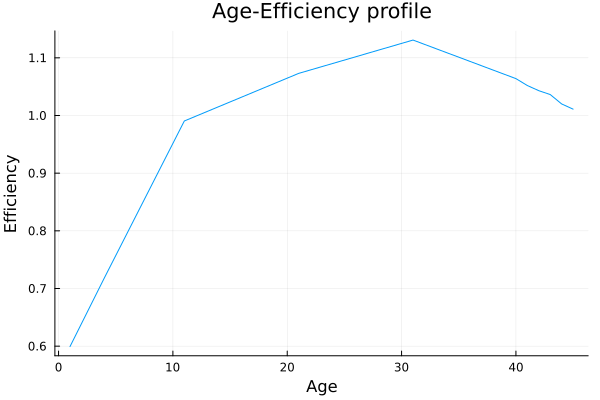

In [46]:
using Plots, Optim, LinearAlgebra, Parameters, DelimitedFiles

# import functions from OLG_functions.jl
include("OLG_functions.jl")

# read in age - efficiency profile from ef.txt
ef = readdlm("ef.txt", '\t')[:,1]

# plot ef across its index 
plot(ef, label="", title="Age-Efficiency profile", xlabel="Age", ylabel="Efficiency")

In [47]:
prim = Primitives()
res = Initialize(prim)
V_induction(prim, res)

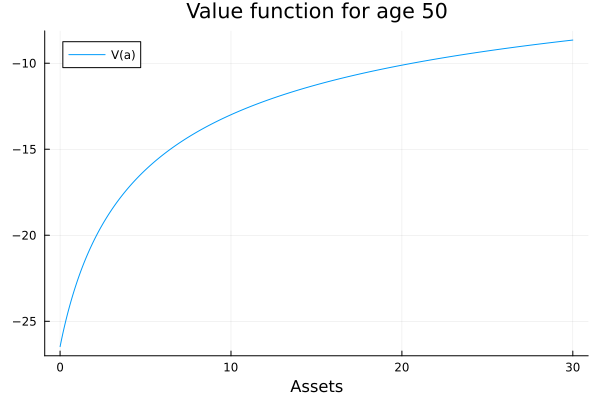

In [48]:
plot(prim.a_grid, res.Vʳ[end-16,:], label = "V(a)", title = "Value function for age 50")
xlabel!("Assets")

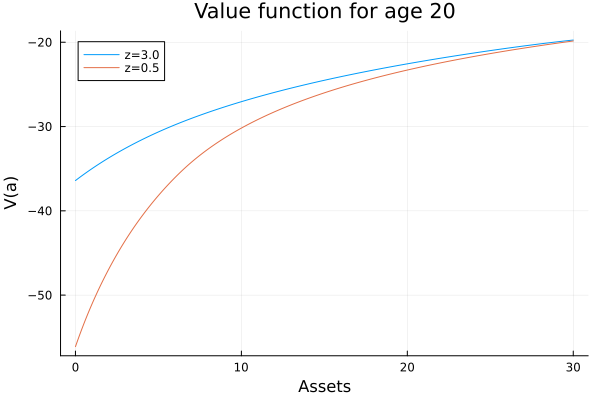

In [49]:
# plot value function for age 20
plot(prim.a_grid, res.Vʷ[20,:,1], label = "z=3.0", title = "Value function for age 20")
plot!(prim.a_grid, res.Vʷ[20,:,2], label = "z=0.5", title = "Value function for age 20")
# update x and y labels
xlabel!("Assets")
ylabel!("V(a)")

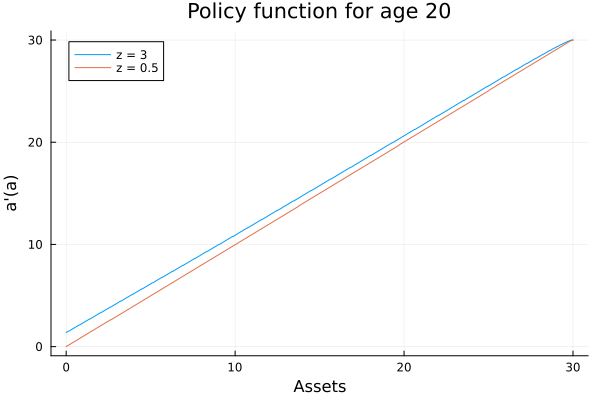

In [50]:
# plot policy function for age 20 for both z
plot(prim.a_grid, res.gʷ[20,:,1], label = "z = 3", title = "Policy function for age 20")
plot!(prim.a_grid, res.gʷ[20,:,2], label = "z = 0.5")
# change x label
xlabel!("Assets")
# change y label
ylabel!("a'(a)")

## Part 2

Here we solve for the stationary distribution of agents across age, productivity and wealth given the choices of households, $F_j(z, a)$. First we find the relative size of each cohort of age $j$ (denoted $\mu_j$) with 

$$ \mu_{j+1} = \frac{\mu_j}{1+n} $$ 

for each $j = 1, 2, ..., N-1$.

Then, we normalize so that $\sum_j \mu_j = 1$. Then we get the initial distribution by $F_1(z_H, 0) = \mu_1 \pi_H$, $F_1(z_L, 0) = \mu_1 \pi_L$, and then iterate forward using policy functions. Note that since retired workers are not characterized by their productivity, the distribution of retired workers is just over age and assets. 

In [51]:
steady_dist(prim, res)

45×1000×2 Array{Float64, 3}:
[:, :, 1] =
 0.0043444    0.0         0.0         …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.000317487  0.0         0.0            0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.000308098  0.0         0.0            0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.000298986  0.0         0.0            0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.000290143  0.0         0.0            0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.000281562  0.0         0.0         …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.000273235  0.0         0.0            0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.000265154  0.0         0.0            0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.000257313  0.0         0.0            0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.000249703  0.0         0.0            0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                                    ⋱            ⋮                   
 0.0          0.0         0.0            0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0          0.0         0.0            0.0  0.0  0.0  0.0  0

In [52]:
sum(res.Fʳ) # proportion in retirement

0.23603132923155665

In [53]:
sum(res.Fʷ) # proportion working

0.7620799882774727

In [54]:
res.Fʷ[1, 1, :]

2-element Vector{Float64}:
 0.00434440090307928
 0.01698304584743265

In [55]:
# sum Fʷ over age and z so it's just over a_grid
Fʷ_collapsed = sum(res.Fʷ, dims = (1, 3))[1, :, 1]
Fʳ_collapsed = sum(res.Fʳ, dims = 1)[1, :]

F_collapsed = Fʷ_collapsed + Fʳ_collapsed

1000-element Vector{Float64}:
 0.3442558990259059
 0.02024702289768194
 0.02018700755397171
 0.020504225325874505
 0.120150781341862
 0.0019754812314186684
 0.0008325352532531772
 0.0017472775145971529
 0.00019957421698853247
 0.0012479103996221558
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

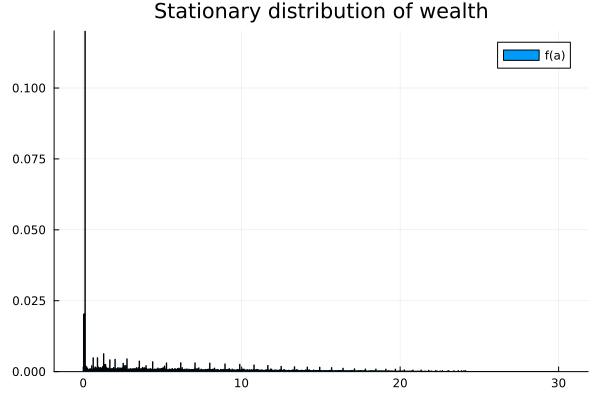

In [61]:
bar(prim.a_grid[2:end], F_collapsed[2:end], label = "f(a)", title = "Stationary distribution of wealth")

---

## Part 3

Here we solve for a steady state in the benchmark model (described above). The algorithm is as follows:

1. Make initial guess for aggregates $K_0$, $L_0$
2. Solve for implied wage $w_0$ and interest rate $r_0$ using firm first order conditions
3. Use government budget constraint to solve for retirement benefits $b = \theta w_0 L_0 / \sum_{j=J^R}^N \mu_j$
4. Solve the household problem for value and policy functions given prices and retirement benefits
5. Find the implied distribution of wealth
6. Solve for the implied aggregate values $K_{new}$, $L_{new}$
7. Iterate aggregates in the direction of the new values, $K_1 = \rho K_{new} + (1-\rho) K_0$, $L_1 = \rho L_{new} + (1-\rho) L_0$ for small $\rho$
8. Take new values as the initial guess and iterate until $\max\{|K_{new} - K_0|, |L_{new} - L_0|\} < \varepsilon$

In [55]:
market_clearing(prim, res; K₀=3.32, L₀=.34)

K = 3.319752920807827, L = 0.34010125860787443


K = 3.319518099814095, L = 0.340200248672668


K = 3.319292725913946, L = 0.3402970045979788


K = 3.319078981387269, L = 0.3403915541132562


K = 3.3188755611669705, L = 0.34048402748054324


K = 3.318684206566412, L = 0.34057442386882236


K = 3.3185025789618647, L = 0.3406627714066461


K = 3.3183280065964738, L = 0.3407491249744071


K = 3.318166373308996, L = 0.3408335605236409


K = 3.3180137275470325, L = 0.3409160621651747


K = 3.3178724057302778, L = 0.3409967291405453


K = 3.317743028526501, L = 0.34107557106786085


K = 3.317621937535606, L = 0.3411526779223086


K = 3.3175068787167907, L = 0.3412280807364483


K = 3.3174027937127413, L = 0.34130176354853103


K = 3.317305964581812, L = 0.341373814822918


K = 3.31721615134696, L = 0.34144425936819617


K = 3.3171305044915207, L = 0.3415131486788478


K = 3.317050047419329, L = 0.34158051133249867


K = 3.3169720034920753, L = 0.3416463296856564


K = 3.316901326395339, L = 0.34171070703045975


K = 3.316833645894524, L = 0.34177366453527347


K = 3.31677438355259, L = 0.3418352180309436


K = 3.316720948959663, L = 0.3418953998701011


K = 3.3166739828649625, L = 0.3419542647094683


K = 3.3166299428166077, L = 0.3420118208250416


K = 3.316593572996501, L = 0.3420681096205868


K = 3.3165629135210435, L = 0.3421231470592266


K = 3.3165343151756197, L = 0.34217693205968336


K = 3.3165117671726487, L = 0.34222954413043183


K = 3.3164944799298834, L = 0.34228100134978734


K = 3.3164789970649093, L = 0.3423313349652277


K = 3.3164674741179447, L = 0.3423805520376614


K = 3.316460966006729, L = 0.34242870523783225


K = 3.316456551884859, L = 0.3424758077827445


K = 3.3164558196986866, L = 0.34252187365139886
Converged in 36 iterations


In [56]:
# interest rate
res.r

0.024184875934499236

In [57]:
# wage
res.w

1.4492922264827355

In [58]:
# social security benefit
res.b

0.23131771547161362

In [59]:
# calculate average utility
welfare = res.Fʳ ⋅ res.uʳ + res.Fʷ ⋅ res.uʷ

-1.894955903190854

In [94]:
# collapse distribution of assets across age and efficiency
a_dist = sum(res.Fʳ, dims=1) + sum(res.Fʷ, dims=(1,3))

# find mean of a_dist
μ_a = prim.a_grid ⋅ a_dist

# find standard deviation of a_dist
σ_a = sqrt.((prim.a_grid .- μ_a).^2 ⋅ a_dist)

# find coefficient of variation
σ_a / μ_a

1.6724876513957527

### Now we run different specifications. 

#### Benchmark without SS.

In [60]:
prim_no_ss = Primitives(θ = 0.0, a_max=50.0)
res_no_ss = Initialize(prim_no_ss)
V_induction(prim_no_ss, res_no_ss)
steady_dist(prim_no_ss, res_no_ss)
market_clearing(prim_no_ss, res_no_ss; tol = .0001, max_iter = 200, K₀=4.70, L₀=.37)

K = 4.695800969731552, L = 0.3699493941628877


K = 4.691695332792751, L = 0.36989937670228984


K = 4.687679179388834, L = 0.36984998226343624


K = 4.683746161902944, L = 0.36980110337535627


K = 4.6799036985189275, L = 0.36975283960129973


K = 4.6761467754739785, L = 0.3697051448084143


K = 4.672473197138022, L = 0.3696580733739217


K = 4.668888739398777, L = 0.36961166964087455


K = 4.665389213082077, L = 0.36956583513015256


K = 4.661965760401109, L = 0.3695206192503721


K = 4.658620818197761, L = 0.3694759905680069


K = 4.655341808076399, L = 0.36943191150859905


K = 4.65214348231849, L = 0.36938835608529746


K = 4.649023491280976, L = 0.369345417875145


K = 4.645970615420355, L = 0.36930306094213083


K = 4.642984937254774, L = 0.36926119821154557


K = 4.6400677872230505, L = 0.3692199405407395


K = 4.6372120007633875, L = 0.3691792312316781


K = 4.634416581054795, L = 0.3691390298137384


K = 4.6316883947904826, L = 0.36909935175243364


K = 4.629015843489389, L = 0.3690601510891398


K = 4.626398428432629, L = 0.36902140904240455


K = 4.62383657102244, L = 0.36898312410074324


K = 4.62147365558124, L = 0.36894573553376425


K = 4.619165077333828, L = 0.3689088656796339


K = 4.616911602662734, L = 0.36887259629474467


K = 4.61470260580446, L = 0.3688368229751904


K = 4.6125460824055295, L = 0.3688015685999363


K = 4.610436424564272, L = 0.3687667906486445


K = 4.608374789048892, L = 0.3687325412277393


K = 4.606363014621092, L = 0.36869879152056684


K = 4.6043905331065185, L = 0.36866548083360295


K = 4.60246261566876, L = 0.36863269610419747


K = 4.600579677039938, L = 0.36860041995949516


K = 4.598738455022996, L = 0.36856862985253175


K = 4.596942303923377, L = 0.368537277655125


K = 4.595193426124371, L = 0.36850639429344795


K = 4.593480191496774, L = 0.36847594800924643


K = 4.591806981988368, L = 0.36844595621698534


K = 4.590172093545802, L = 0.36841646270945866


K = 4.588574390447501, L = 0.36838733154239706


K = 4.587011483934563, L = 0.36835866712742976


K = 4.585481094326462, L = 0.3683303999760649


K = 4.583987256795307, L = 0.36830259908330343


K = 4.582528043902305, L = 0.3682752269466347


K = 4.581098245514144, L = 0.3682482666848279


K = 4.579699818126796, L = 0.36822173468213604


K = 4.578333903417014, L = 0.3681956010072323


K = 4.576997244627394, L = 0.3681698699364223


K = 4.575689040668322, L = 0.3681445480202462


K = 4.574408956799589, L = 0.36811958106758413


K = 4.573164677074813, L = 0.3680950375310188


K = 4.571949773619156, L = 0.36807088021287376


K = 4.570761963514415, L = 0.3680471237354776


K = 4.569599929080344, L = 0.36802372454518784


K = 4.568466359153511, L = 0.36800069772539235


K = 4.56735593247854, L = 0.36797803216389574


K = 4.566266014685518, L = 0.36795570145642226


K = 4.5651989632857815, L = 0.3679337208118738


K = 4.5641550075697594, L = 0.36791210276674063


K = 4.563135368276423, L = 0.36789082824821556


K = 4.562139871609496, L = 0.3678699385767555


K = 4.561165905522493, L = 0.3678493871882689


K = 4.5602146045923515, L = 0.36782911185329353


K = 4.55928196044875, L = 0.36780916133336006


K = 4.558361953817959, L = 0.3677895014401454


K = 4.557460779720819, L = 0.367770130779566


K = 4.556580525609701, L = 0.3677510562952133


K = 4.555720746305472, L = 0.367732270649018


K = 4.554879853868583, L = 0.36771380959073074


K = 4.554059481265253, L = 0.36769565223058615


K = 4.553258224643662, L = 0.36767778394766176


K = 4.55247319999853, L = 0.36766017866942274


K = 4.551706769535842, L = 0.36764283844086804


K = 4.550959898648636, L = 0.36762577710176986


K = 4.550229462302457, L = 0.36760900120643347


K = 4.54951472919161, L = 0.36759251446048874


K = 4.548812573263662, L = 0.3675762804712878


K = 4.54812507831788, L = 0.36756032634537394


K = 4.547452342082888, L = 0.36754464198131026


K = 4.546796865546729, L = 0.36752916513526984


K = 4.5461553326619395, L = 0.36751391433652675


K = 4.545526273714144, L = 0.36749888127938724


K = 4.544911149374322, L = 0.36748409899945217


K = 4.5443072862834475, L = 0.3674695244084786


K = 4.543717528941957, L = 0.3674551667094511


K = 4.543140627635618, L = 0.36744105353914575


K = 4.542573861789304, L = 0.367427165876023


K = 4.542020504568923, L = 0.36741351752302603


K = 4.541480533996624, L = 0.36740010805901535


K = 4.5409547285016965, L = 0.36738695784980385


K = 4.540442201067154, L = 0.36737402826465115


K = 4.5399410955641475, L = 0.36736132174274744


K = 4.539449693122617, L = 0.367348830158462


K = 4.538969664965049, L = 0.3673365490345488


K = 4.538500973782599, L = 0.3673244641183814


K = 4.538042369806999, L = 0.3673125851837029


K = 4.537593998349178, L = 0.36730091042464663


K = 4.537158367854233, L = 0.367289441897263


K = 4.536731627350312, L = 0.3672781716738979


K = 4.536314147341399, L = 0.3672670985948919


K = 4.535905089155218, L = 0.3672562167062832


K = 4.5355045413550235, L = 0.3672455242538986


K = 4.535112125769077, L = 0.36723501731512886


K = 4.534726945119538, L = 0.3672246555369408


K = 4.534350925463414, L = 0.3672144890744012


K = 4.533981816339743, L = 0.36720446024698866


K = 4.533619997992111, L = 0.3671945971304605


K = 4.533265330249328, L = 0.3671848872427145


K = 4.53292112243844, L = 0.3671753502670385


K = 4.532584974525853, L = 0.3671659764927377


K = 4.532256874718664, L = 0.3671567835427576


K = 4.531935531383883, L = 0.36714775292270685


K = 4.5316211240486535, L = 0.36713887983458127


K = 4.531312993178859, L = 0.36713016263777565


K = 4.531011994836778, L = 0.3671215982978273


K = 4.530717442910384, L = 0.3671131850402244


K = 4.530428400548367, L = 0.36710489480149167


K = 4.530146042018996, L = 0.36709674796692576


K = 4.529870391842794, L = 0.3670887447729553


K = 4.529600510975862, L = 0.36708088371261205


K = 4.52933613891082, L = 0.3670731594841558


K = 4.52907798955158, L = 0.367065575230548


K = 4.5288255802811275, L = 0.3670581284750225


K = 4.528578499078228, L = 0.3670508150272718


K = 4.5283372140177205, L = 0.3670436275032387


K = 4.528101047667925, L = 0.36703656918807964


K = 4.527869908758837, L = 0.36702963581884807


K = 4.527643613584533, L = 0.36702282789549545


K = 4.527422456646608, L = 0.3670161412109836


K = 4.527204603977875, L = 0.367009545574667


K = 4.526991632938968, L = 0.3670030650415734


K = 4.526783041205544, L = 0.36699670014653607


K = 4.526591500813873, L = 0.3669904613825091


K = 4.526403186480224, L = 0.3669843098654833


K = 4.526218846441894, L = 0.3669782691031605


K = 4.526040509987281, L = 0.36697236322242827


K = 4.525866176435807, L = 0.36696655102119763


K = 4.525695258947399, L = 0.3669608432583387


K = 4.525527922108849, L = 0.36695523472533415


K = 4.525364262049223, L = 0.3669497266711724


K = 4.525204184160891, L = 0.36694431907599084


K = 4.525047354730701, L = 0.36693900757443754


K = 4.524894184024628, L = 0.3669337911898613


K = 4.524744441160803, L = 0.3669286687293671


K = 4.524597820889357, L = 0.3669236375506221


K = 4.524453797775669, L = 0.36691867201499856


K = 4.524315319564648, L = 0.3669138014016154


K = 4.524179959010152, L = 0.36690901969532047


K = 4.524047267270286, L = 0.3669043246400897


K = 4.5239173342937855, L = 0.36689971430203455


K = 4.523789966150995, L = 0.3668951883580882


K = 4.523665384410449, L = 0.3668907446670541


K = 4.52354336749299, L = 0.3668863830172679


K = 4.523421932048934, L = 0.36688208191676536


K = 4.523303012782623, L = 0.36687785969029446


K = 4.523187177932596, L = 0.36687371446673833


K = 4.5230738356826565, L = 0.36686964419482854


K = 4.522962839102828, L = 0.3668656490093884


K = 4.522853956673727, L = 0.3668617265389811


K = 4.522748215400447, L = 0.36685785473773735


K = 4.522644023160524, L = 0.3668540452755885


K = 4.522541968994279, L = 0.3668503059383755


K = 4.5224428362618925, L = 0.36684665177677467


K = 4.522346402555856, L = 0.36684306546017686


K = 4.52225189752394, L = 0.3668395454150832


K = 4.522159299849011, L = 0.3668360903076779


K = 4.522068592577372, L = 0.3668326968873124


K = 4.521979876184121, L = 0.36682936628869794


K = 4.5218929541505775, L = 0.3668260974720726


K = 4.521808108849813, L = 0.3668228916157848


K = 4.521725049360315, L = 0.3668197449875016


K = 4.5216430921896045, L = 0.3668166393179887


K = 4.52156273521844, L = 0.36681359050802453


K = 4.521483941223414, L = 0.3668105977981811


K = 4.521406730890755, L = 0.36680766059330155


K = 4.521331076535598, L = 0.3668047781619457


K = 4.521257398953238, L = 0.3668019497338543


K = 4.521185194303344, L = 0.36679917397959827


K = 4.521114048307345, L = 0.3667964420747002


K = 4.521044325231266, L = 0.3667937610555515


K = 4.520976036862467, L = 0.36679112671977904


K = 4.520909595062145, L = 0.36678854339216393


K = 4.52084464079432, L = 0.36678600769754777


K = 4.520779794876392, L = 0.3667835145796801


K = 4.520716390552878, L = 0.36678106817233513


K = 4.520654241216784, L = 0.3667786668989408


K = 4.520593388839875, L = 0.3667763103818437


K = 4.520534181104065, L = 0.36677399823583207


K = 4.520473679553636, L = 0.3667716927100496


K = 4.520414628109169, L = 0.3667694305095604


K = 4.520356757693591, L = 0.3667672104301658


K = 4.5203000454282805, L = 0.36676503169539026


K = 4.5202444674082765, L = 0.36676289354348585


K = 4.520190000948673, L = 0.36676079522622895


K = 4.520136607853572, L = 0.3667587356614032


K = 4.520084271922167, L = 0.3667567144160386
Converged in 197 iterations


In [61]:
res_no_ss.r

0.012145459033258393

In [62]:
res_no_ss.w

1.5807295338951146

In [63]:
res_no_ss.b

0.0

In [64]:
# calculate average utility
welfare_no_ss = res_no_ss.Fʳ ⋅ res_no_ss.uʳ + res_no_ss.Fʷ ⋅ res_no_ss.uʷ

-1.8999850783238692

In [95]:
# collapse distribution of assets across age and efficiency
a_dist = sum(res_no_ss.Fʳ, dims=1) + sum(res_no_ss.Fʷ, dims=(1,3))

# find mean of a_dist
μ_a = prim_no_ss.a_grid ⋅ a_dist

# find standard deviation of a_dist
σ_a = sqrt.((prim_no_ss.a_grid .- μ_a).^2 ⋅ a_dist)

# find coefficient of variation
σ_a / μ_a

1.5019031090204262

#### No risk, with SS

In [65]:
π_no_risk = Array{Float64,2}(I, 1, 1)

prim_no_risk = Primitives(z_grid=[.5], π=π_no_risk, initial_dist=[1.0], a_max=50.0, na=500)
res_no_risk = Initialize(prim_no_risk)
V_induction(prim_no_risk, res_no_risk)
steady_dist(prim_no_risk, res_no_risk)
market_clearing(prim_no_risk, res_no_risk; K₀=1.06, L₀=.16)

K = 1.063292112589924, L = 0.16000273949212696


K = 1.065410386625381, L = 0.16001373941685287


K = 1.0674862951801287, L = 0.16002555411696823


K = 1.0695206855637815, L = 0.1600381383962227


K = 1.0711763083367871, L = 0.16005144888006786


K = 1.0727988186543327, L = 0.16006527548160318


K = 1.0743888787655274, L = 0.16007958684853563


K = 1.0751228240505977, L = 0.16010934541567545


K = 1.0758420904299666, L = 0.16013875606678124


K = 1.0765469714817482, L = 0.16016781967179194


K = 1.077237754912494, L = 0.16019653724150298


K = 1.077914722674625, L = 0.16022490992026617


K = 1.0785781510815136, L = 0.16025293897897908


K = 1.0792283109202643, L = 0.16028062580835237


K = 1.07986546756224, L = 0.16030797191244478


K = 1.0804898810713761, L = 0.1603349789024553


K = 1.0811018063103295, L = 0.160361648490763


K = 1.081701493044504, L = 0.16038798248520525


K = 1.0822891860439947, L = 0.1604139827835846


K = 1.0826193361969325, L = 0.16043007212303154


K = 1.0829428833468115, L = 0.16044593992834955


K = 1.083259959553693, L = 0.16046158825194362


K = 1.0835706942364367, L = 0.16047701916305804


K = 1.0830883819984651, L = 0.16050634936146918


K = 1.0834025482323135, L = 0.16052067096503184


K = 1.083710431141485, L = 0.16053480445302973


K = 1.084012156392473, L = 0.16054875125866275


K = 1.0835210149113805, L = 0.1605766287411427


K = 1.0838265284869706, L = 0.16058952595205594


K = 1.0841259317910488, L = 0.16060226393692284


K = 1.0844193470290455, L = 0.1606148435432673


K = 1.0839200617352218, L = 0.16064138272423745


K = 1.084217594374335, L = 0.16065296773517374


K = 1.084509176360666, L = 0.16066442012901358


K = 1.0847949267072703, L = 0.16067574021397038


K = 1.084288129819882, L = 0.16070104647806108


K = 1.084578301097302, L = 0.16071142262643712


K = 1.0848626689491736, L = 0.1607216906665931


K = 1.0851413494440079, L = 0.1607318504101144


K = 1.0854144563289454, L = 0.1607419017292304


K = 1.0848952688491236, L = 0.16076595752015602


K = 1.0851732973459587, L = 0.16077511181510118


K = 1.085445765272857, L = 0.16078418059925403


K = 1.0857127838412175, L = 0.16079316327821158


K = 1.0851876298111502, L = 0.16081617371888252


K = 1.085459811088745, L = 0.16082430270225354


K = 1.0857265487407877, L = 0.16083236714576535


K = 1.0859879516397897, L = 0.1608403660256941


K = 1.085457294253751, L = 0.16086241408868168


K = 1.0857240822424936, L = 0.16086959915185553


K = 1.0859855344714615, L = 0.16087673897625526


K = 1.0862417576558498, L = 0.16088383214315113


K = 1.08570602414949, L = 0.16090499419646154


K = 1.085967837540318, L = 0.16091131025128155


K = 1.0862244146633293, L = 0.16091759883198126


K = 1.0864758602438804, L = 0.1609238581563856


K = 1.0859354446857599, L = 0.16094420449093924


K = 1.0861926696658624, L = 0.16094972048728387


K = 1.0864447501463628, L = 0.16095522536044318


K = 1.0866917890172532, L = 0.16096071699382547


K = 1.0869338871107257, L = 0.16096619336949317


K = 1.0863843110152682, L = 0.16098576538478085


K = 1.0866325586687806, L = 0.16099052609831788


K = 1.0868758413692228, L = 0.16099528898153054


K = 1.087114258415656, L = 0.16100005169656756


K = 1.0865610748941, L = 0.1610189262665968


K = 1.0868057872700356, L = 0.16102300257443386


K = 1.0870456053984525, L = 0.16102709521906539


K = 1.0872806271643012, L = 0.16103120156864098


K = 1.0867241162677723, L = 0.1610494346693019


K = 1.0869655678162344, L = 0.16105288150927352


K = 1.0872021903337274, L = 0.1610563577114089


K = 1.0874340804008706, L = 0.16105986037366324


K = 1.0868745004396103, L = 0.16107750347168345


K = 1.0871129443046357, L = 0.161080371355342


K = 1.0873466192923606, L = 0.16108328057718432


K = 1.087575620780331, L = 0.16108622798683925


K = 1.0870132100114815, L = 0.16110332840452404


K = 1.0872488796850697, L = 0.16110566377524121


K = 1.087479835965186, L = 0.16110805149569934


K = 1.0877061731197, L = 0.1611104881872905


K = 1.0879279835311237, L = 0.16111297059494326


K = 1.0873585255072584, L = 0.1611296083146294


K = 1.0875872888709308, L = 0.16113149375270752
Converged in 84 iterations


In [66]:
res_no_risk.r

0.046075761147343866

In [67]:
res_no_risk.w

1.2725974319231166

In [68]:
res_no_risk.b

0.0955629233869586

In [69]:
# calculate average utility
welfare_no_risk = res_no_risk.Fʳ ⋅ res_no_risk.uʳ + res_no_risk.Fʷ ⋅ res_no_risk.uʷ

-2.381299351416785

In [96]:
# collapse distribution of assets across age and efficiency
a_dist = sum(res_no_risk.Fʳ, dims=1) + sum(res_no_risk.Fʷ, dims=(1,3))

# find mean of a_dist
μ_a = prim_no_risk.a_grid ⋅ a_dist

# find standard deviation of a_dist
σ_a = sqrt.((prim_no_risk.a_grid .- μ_a).^2 ⋅ a_dist)

# find coefficient of variation
σ_a / μ_a

0.8323845192423013

### No risk, no SS

In [70]:
π_no_risk = Array{Float64,2}(I, 1, 1)

prim_no_risk_ss = Primitives(θ=0.0, z_grid=[.5], π=π_no_risk, initial_dist=[1.0], a_max=50.0)
res_no_risk_ss = Initialize(prim_no_risk_ss)
V_induction(prim_no_risk_ss, res_no_risk_ss)
steady_dist(prim_no_risk_ss, res_no_risk_ss)
market_clearing(prim_no_risk_ss, res_no_risk_ss; K₀=1.28, L₀=.17)

K = 1.2798416455393078, L = 0.1699722136601749


K = 1.2796864581678296, L = 0.1699449972664403


K = 1.2795343745437808, L = 0.16991833910865572


K = 1.279385332592213, L = 0.16989222771763257


K = 1.2792392714796768, L = 0.16986665186017133


K = 1.279096131589391, L = 0.16984160053420097


K = 1.2789558544969108, L = 0.16981706296401838


K = 1.2788183829462805, L = 0.169793028595626


K = 1.2786836608266627, L = 0.1697694870921654


K = 1.2785516331494373, L = 0.16974642832944498


K = 1.2784222460257564, L = 0.16972384239155966


K = 1.278295446644549, L = 0.16970171956660104


K = 1.278171183250966, L = 0.16968005034245576


K = 1.2780494051252544, L = 0.1696588254026904


K = 1.277930062562057, L = 0.1696380356225214


K = 1.2778131068501237, L = 0.16961767206486766


K = 1.277698490252429, L = 0.16959772597648484


K = 1.2775861659866883, L = 0.16957818878417896


K = 1.2774760882062624, L = 0.16955905209109834


K = 1.277368211981445, L = 0.1695403076731017


K = 1.2772624932811238, L = 0.1695219474752012


K = 1.2771588889548091, L = 0.16950396360807887


K = 1.2770573567150207, L = 0.16948634834467466


K = 1.2769578551200282, L = 0.16946909411684483


K = 1.2768603435569355, L = 0.1694521935120893


K = 1.2767647822251045, L = 0.16943563927034636


K = 1.2766711321199102, L = 0.1694194242808535


K = 1.2765793550168199, L = 0.16940354157907284


K = 1.2764894134557914, L = 0.16938798434368005


K = 1.2764012707259833, L = 0.1693727458936152


K = 1.2763148908507715, L = 0.16935781968519442


K = 1.276230238573064, L = 0.16934319930928118


K = 1.2761472793409105, L = 0.1693288784885158


K = 1.2760659792934002, L = 0.16931485107460198


K = 1.2759863052468399, L = 0.16930111104564938


K = 1.2759082246812108, L = 0.1692876525035709


K = 1.2758317057268944, L = 0.1692744696715337


K = 1.2757567171516644, L = 0.1692615568914626


K = 1.275683228347939, L = 0.16924890862159503


K = 1.275611209320288, L = 0.16923651943408638


K = 1.27554063067319, L = 0.1692243840126647


K = 1.275471463599034, L = 0.16921249715033365


K = 1.2754036798663613, L = 0.16920085374712285


K = 1.275337251808342, L = 0.16918944880788475


K = 1.275272152311483, L = 0.16917827744013658


K = 1.2752083548045612, L = 0.16916733485194713


K = 1.2751458332477779, L = 0.16915661634986673


K = 1.27508456212213, L = 0.16914611733690024


K = 1.2750245164189953, L = 0.1691358333105215


K = 1.2749656716299231, L = 0.16912575986072906


K = 1.2749080037366325, L = 0.16911589266814148


K = 1.2748514892012077, L = 0.16910622750213244


K = 1.2747961049564913, L = 0.16909676021900383


K = 1.2747418283966694, L = 0.16908748676019683


K = 1.2746886373680437, L = 0.16907840315053957


K = 1.2746365101599906, L = 0.16906950549653108


K = 1.2745854254960987, L = 0.1690607899846606


K = 1.2745353625254845, L = 0.16905225287976142


K = 1.2744863008142826, L = 0.16904389052339874


K = 1.2744382203373048, L = 0.1690356993322907


K = 1.2743911014698666, L = 0.16902767579676198


K = 1.2743449249797771, L = 0.16901981647922923


K = 1.2742996720194895, L = 0.16901211801271776


K = 1.2742553241184076, L = 0.1690045770994087


K = 1.2742118631753472, L = 0.1689971905092162


K = 1.2741692714511481, L = 0.1689899550783939


K = 1.2741275315614329, L = 0.16898286770817011


K = 1.274086626469512, L = 0.16897592536341113


K = 1.2740465394794296, L = 0.16896912507131207


K = 1.2740072542291487, L = 0.16896246392011466


K = 1.2739687546838736, L = 0.16895593905785156


K = 1.273931025129504, L = 0.16894954769111636


K = 1.2738940501662217, L = 0.16894328708385914


K = 1.273857814702205, L = 0.16893715455620661


K = 1.2738223039474688, L = 0.16893114748330676


K = 1.2737875034078272, L = 0.1689252632941972


K = 1.2737533988789784, L = 0.1689194994706968


K = 1.2737199764407066, L = 0.16891385354632027


K = 1.2736872224512001, L = 0.16890832310521503


K = 1.273655123541484, L = 0.16890290578111986


K = 1.273623666609962, L = 0.16889759925634523


K = 1.2735928388170705, L = 0.16889240126077443


K = 1.273562627580037, L = 0.1688873095708855


K = 1.273533020567744, L = 0.16888232200879297


K = 1.273504005695697, L = 0.1688774364413097


K = 1.2734755711210908, L = 0.16887265077902777


K = 1.2734477052379767, L = 0.16886796297541845


K = 1.273420396672525, L = 0.16886337102595064


K = 1.2733936342783823, L = 0.16885887296722749


K = 1.2733674071321224, L = 0.16885446687614078


K = 1.2733417045287878, L = 0.1688501508690427


K = 1.27331651597752, L = 0.16884592310093471


K = 1.2732918311972774, L = 0.16884178176467318


K = 1.2732676401126397, L = 0.1688377250901912


K = 1.2732439328496947, L = 0.1688337513437366


K = 1.2732206997320086, L = 0.16882985882712545


K = 1.2731979312766761, L = 0.16882604587701122


K = 1.2731756181904503, L = 0.16882231086416868


K = 1.2731537513659492, L = 0.16881865219279282


K = 1.273132321877938, L = 0.16881506829981188


K = 1.2731113209796872, L = 0.1688115576542149


K = 1.2730907400994012, L = 0.1688081187563928


K = 1.273070570836721, L = 0.16880475013749316


K = 1.2730508049592943, L = 0.16880145035878832


K = 1.2730314343994162, L = 0.16879821801105646


K = 1.2730124512507357, L = 0.16879505171397519


K = 1.2729938477650289, L = 0.16879195011552803


K = 1.2729756163490362, L = 0.16878891189142284


K = 1.2729577495613633, L = 0.16878593574452225


K = 1.2729402401094438, L = 0.16878302040428578


K = 1.2729230808465628, L = 0.16878016462622367


K = 1.2729062647689393, L = 0.16877736719136158


K = 1.2728897850128684, L = 0.16877462690571668


K = 1.272873634851919, L = 0.16877194259978415


K = 1.2728578076941883, L = 0.16876931312803464


K = 1.2728422970796123, L = 0.16876673736842168


K = 1.2728270966773279, L = 0.1687642142218996


K = 1.272812200283089, L = 0.168761742611951


K = 1.272797601816735, L = 0.1687593214841243


K = 1.2727832953197082, L = 0.16875694980558045


K = 1.2727692749526218, L = 0.1687546265646493


K = 1.2727555349928772, L = 0.16875235077039477


K = 1.2727420698323275, L = 0.1687501214521893


K = 1.2727288739749887, L = 0.16874793765929677


K = 1.2727159420347967, L = 0.16874579846046422


K = 1.2727032687334086, L = 0.16874370294352176


K = 1.2726908488980482, L = 0.16874165021499082


K = 1.272678677459395, L = 0.16873963939970052
Converged in 128 iterations


In [71]:
res_no_risk_ss.r

0.03878752343021569

In [72]:
res_no_risk_ss.w

1.3245861221156243

In [73]:
# calculate average utility

welfare_no_risk_ss = res_no_risk_ss.Fʳ ⋅ res_no_risk_ss.uʳ + res_no_risk_ss.Fʷ ⋅ res_no_risk_ss.uʷ

-2.3229533851252047

In [97]:
# collapse distribution of assets across age and efficiency
a_dist = sum(res_no_risk_ss.Fʳ, dims=1) + sum(res_no_risk_ss.Fʷ, dims=(1,3))

# find mean of a_dist
μ_a = prim_no_risk_ss.a_grid ⋅ a_dist

# find standard deviation of a_dist
σ_a = sqrt.((prim_no_risk_ss.a_grid .- μ_a).^2 ⋅ a_dist)

# find coefficient of variation
σ_a / μ_a

0.9001579476288044

### Exogenous labor, with SS

In [74]:
prim_ex_labor = Primitives(γ=1.0, a_max=100.0)
res_ex_labor = Initialize(prim_ex_labor)
V_induction(prim_ex_labor, res_ex_labor)
steady_dist(prim_ex_labor, res_ex_labor)
market_clearing(prim_ex_labor, res_ex_labor; K₀=7.16, L₀=.76)

K = 7.161828105995061, L = 0.7600058306138343


K = 7.1636068790444725, L = 0.7600115446153917


K = 7.1653382245533885, L = 0.7600171443369179


K = 7.1670188226546605, L = 0.7600226320640138


K = 7.168658892151676, L = 0.7600280100365676


K = 7.170252614406942, L = 0.7600332804496704


K = 7.171808326999813, L = 0.7600384454545109


K = 7.17332335400137, L = 0.7600435071592548


K = 7.174800648049644, L = 0.7600484676299037


K = 7.17623876458761, L = 0.7600533288911396


K = 7.177645458796305, L = 0.7600580929271509


K = 7.179017072472214, L = 0.7600627616824419


K = 7.180352113921272, L = 0.760067337062627


K = 7.181643367067428, L = 0.7600718209352085


K = 7.182897143295129, L = 0.7600762151303384


K = 7.184120992443263, L = 0.7600805214415658


K = 7.185295359537658, L = 0.7600847416265686


K = 7.186442131584224, L = 0.7600888774078712


K = 7.1875364126478924, L = 0.7600929304735478


K = 7.188605738242107, L = 0.7600969024779107


K = 7.189641644756887, L = 0.7601007950421864


K = 7.190652298788369, L = 0.7601046097551769


K = 7.191633801328707, L = 0.7601083481739073


K = 7.192591020642992, L = 0.7601120118242632


K = 7.193521046517894, L = 0.760115602201612


K = 7.194422195123584, L = 0.7601191207714137


K = 7.195294694725839, L = 0.7601225689698192


K = 7.1961465551542485, L = 0.7601259482042568


K = 7.196969605789811, L = 0.7601292598540056


K = 7.197773779571115, L = 0.7601325052707595


K = 7.198557895959026, L = 0.7601356857791784


K = 7.1993212814859975, L = 0.7601388026774288


K = 7.20006378749697, L = 0.7601418572377145


K = 7.200788983764799, L = 0.7601448507067942


K = 7.201509502885853, L = 0.7601477843064922


K = 7.202211516791839, L = 0.7601506592341964


K = 7.202896879969189, L = 0.7601534766633465


K = 7.203561546974401, L = 0.7601562377439136


K = 7.204211332753316, L = 0.7601589436028694


K = 7.204845092395621, L = 0.760161595344646


K = 7.20545491441063, L = 0.760164194051587


K = 7.20605625857627, L = 0.7601667407843893


K = 7.2066425997222225, L = 0.7601692365825354


K = 7.207213291957649, L = 0.7601716824647187


K = 7.207768892305152, L = 0.7601740794292584


K = 7.208307349871107, L = 0.7601764284545072


K = 7.208833808481592, L = 0.7601787304992511


K = 7.209355886666106, L = 0.7601809865031003


K = 7.209861331925686, L = 0.7601831973868725


K = 7.210352256399352, L = 0.7601853640529692


K = 7.210830584716081, L = 0.7601874873857442


K = 7.211296397658893, L = 0.7601895682518633


K = 7.2117625696872585, L = 0.7601916075006601
Converged in 53 iterations


In [75]:
res_ex_labor.r

0.02530293592419132

In [76]:
res_ex_labor.w

1.4385762715112445

In [77]:
res_ex_labor.b

0.5096568095971343

In [78]:
# calculate average utility
welfare_ex_labor = res_ex_labor.Fʳ ⋅ res_ex_labor.uʳ + res_ex_labor.Fʷ ⋅ res_ex_labor.uʷ

-1.2254882018523752

In [98]:
# collapse distribution of assets across age and efficiency
a_dist = sum(res_ex_labor.Fʳ, dims=1) + sum(res_ex_labor.Fʷ, dims=(1,3))

# find mean of a_dist
μ_a = prim_ex_labor.a_grid ⋅ a_dist

# find standard deviation of a_dist
σ_a = sqrt.((prim_ex_labor.a_grid .- μ_a).^2 ⋅ a_dist)

# find coefficient of variation
σ_a / μ_a

1.6633704079990925

### finally, exogenous labor, no SS

In [80]:
prim_ex_ss = Primitives(θ=0.0, γ=1.0, a_max=100.0)
res_ex_ss = Initialize(prim_ex_ss)
V_induction(prim_ex_ss, res_ex_ss)
steady_dist(prim_ex_ss, res_ex_ss)
market_clearing(prim_ex_ss, res_ex_ss; K₀=10.07, L₀=.76)

K = 10.072374423656058, L = 0.7600058306138342


K = 10.074700192289944, L = 0.7600115446153917


K = 10.076974826798846, L = 0.7600171443369179


K = 10.079201195148219, L = 0.7600226320640135


K = 10.081378916364743, L = 0.7600280100365673


K = 10.083515144666217, L = 0.7600332804496701


K = 10.085602036778125, L = 0.7600384454545107


K = 10.087648815516147, L = 0.7600435071592545


K = 10.089653179952883, L = 0.7600484676299034


K = 10.091619029734632, L = 0.7600533288911393


K = 10.093542066309164, L = 0.7600580929271504


K = 10.095426482122363, L = 0.7600627616824415


K = 10.097259025361277, L = 0.7600673370626266


K = 10.099051316302575, L = 0.7600718209352081


K = 10.100796344158324, L = 0.760076215130338


K = 10.102519016316931, L = 0.7600805214415651


K = 10.104214167138378, L = 0.7600847416265678


K = 10.105876047225983, L = 0.7600888774078705


K = 10.107505336387872, L = 0.7600929304735471


K = 10.109096318223674, L = 0.76009690247791


K = 10.11065112863883, L = 0.7601007950421858


K = 10.112166658925524, L = 0.760104609755176


K = 10.1136465794271, L = 0.7601083481739065


K = 10.11510391962654, L = 0.7601120118242622


K = 10.116531229338346, L = 0.7601156022016109


K = 10.117927935084298, L = 0.7601191207714129


K = 10.119293956059334, L = 0.7601225689698184


K = 10.120631551112577, L = 0.760125948204256


K = 10.121933843107955, L = 0.7601292598540049


K = 10.123202071398483, L = 0.760132505270759


K = 10.124443193452116, L = 0.7601356857791777


K = 10.125658003856085, L = 0.7601388026774281


K = 10.126855030336877, L = 0.7601418572377135


K = 10.128026964874543, L = 0.7601448507067935


K = 10.129173914247074, L = 0.7601477843064918


K = 10.130294809020779, L = 0.7601506592341959


K = 10.131390771701207, L = 0.7601534766633461


K = 10.13246780830913, L = 0.7601562377439132


K = 10.133537159560774, L = 0.7601589436028688


K = 10.134582260704747, L = 0.7601615953446454


K = 10.13560634201983, L = 0.7601641940515865


K = 10.136608328398655, L = 0.7601667407843888


K = 10.137589966664867, L = 0.7601692365825351


K = 10.13866838475975, L = 0.7601716824647186


K = 10.139722553977823, L = 0.7601740794292581


K = 10.140753101126665, L = 0.7601764284545071


K = 10.141769694547905, L = 0.760178730499251


K = 10.142778460256162, L = 0.7601809865031


K = 10.143763279238808, L = 0.7601831973868721


K = 10.14472614084117, L = 0.7601853640529688


K = 10.145668626446897, L = 0.7601874873857434


K = 10.146589867573054, L = 0.7601895682518625


K = 10.147489858957476, L = 0.7601916075006594
Converged in 53 iterations


In [81]:
res_ex_ss.r

0.008556344490157061

In [82]:
res_ex_ss.w

1.6267594047306737

In [83]:
# calculate average utility
welfare_ex_ss = res_ex_ss.Fʳ ⋅ res_ex_ss.uʳ + res_ex_ss.Fʷ ⋅ res_ex_ss.uʷ

-1.227724051474365

In [99]:
# collapse distribution of assets across age and efficiency
a_dist = sum(res_ex_ss.Fʳ, dims=1) + sum(res_ex_ss.Fʷ, dims=(1,3))

# find mean of a_dist
μ_a = prim_ex_ss.a_grid ⋅ a_dist

# find standard deviation of a_dist
σ_a = sqrt.((prim_ex_ss.a_grid .- μ_a).^2 ⋅ a_dist)

# find coefficient of variation
σ_a / μ_a

1.4327855142873167

1.  The interest rate with social security is approximately 2.4%, while the population growth rate is 1.1%, implying that social security leads workers to underinvest in capital. Eliminating social security leads to an increase in aggregate capital from 3.3 to 4.5, and an increase in aggregate labor from .34 to about .37. Agents are incentivized to work and save more in order to prepare for retirement, as social security provides retirement insurance. With higher capital, the marginal product of labor is higher, also inducing higher labor demand, as seen by the in- crease in aggregate capital and the wage. Aggregate welfare, as measured by average utility, very slightly decreases with the removal of social security since some people insufficiently smooth consumption. The poor (those with more low productivity shocks) are adversely affected by the removal of social security as they are less able to save in preparation for retirement. The coefficient of variation decreases from 1.67 to 1.50, signifying a reduction in wealth inequality with the removal of social security, perhaps because those who would not hold assets in the presence of social security are required to hold some assets.

2.  Capital stock decreases significantly from the benchmark model to the case with no risk. Agents don’t have to precautionarily save to insure against productivity shocks. In this economy, there is actually an increase in total welfare from the elimination of social security. With risk averse agents, social security provides welfare gain by smoothing consumption across agents facing idiosyncratic risk. However, once we eliminate this risk, the only difference in welfare comes from the labor distortions from the tax required to fund social security. Welfare calculations may be misleading if they fail to account for transition costs.

3.  In the previous economies, removing social security actually increased aggregate labor supply because the distortions from the labor tax were outweighed by the increased labor demand from the larger capital supply. However, there is obviously no labor response when labor supply is inelastic. Therefore, the tax on labor causes no distortions, and social security is strictly preferred ex ante, and is preferred by more in the interim as a means of smoothing consumption in retirement.

| Variable | Benchmark Model |  | No Risk |  | Exogenous Labor |  |
|----------|-----------------|--|---------|--|-----------------|--|
|          | With SS         | W/O SS | With SS | W/O SS | With SS | W/O SS |
| Capital K | 3.316 | 4.520 | 1.088 | 1.273 | 7.212 | 10.147 |
| Labor L | 0.343 | 0.366 | 0.161 | 0.169 | 0.760 | 0.760 |
| Wage w | 1.449 | 1.581 | 1.273 | 1.324 | 1.439 | 1.627 |
| Interest r | 0.024 | 0.012 | 0.046 | 0.039 | 0.025 | 0.009 |
| Pension Benefit b | 0.231 | 0.0 | 0.095 | 0.00 | 0.510 | 0.00 |
| Total Welfare W | -1.895 | -1.9 | -2.381 | -2.323 | -1.225 | -1.228 |
| CV(wealth) | 1.672 | 1.502 | 0.832 | 0.9 | 1.663 | 1.433 |